In [1]:
import numpy as np
import re
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Data Preparation
sentences = '''We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.'''

In [3]:
# Clean Data
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

In [4]:
# Vocabulary
words = sentences.split()
vocab = set(words)

In [5]:
# Define vocabulary size
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [6]:
# Create word-to-index and index-to-word mappings
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [7]:
# Generate training data
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])
# Prepare data for model
context_data = np.array([[word_to_ix[w] for w in context] for context, _ in data])
target_data = np.array([word_to_ix[target] for _, target in data])


[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [8]:
# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=2 * context_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 10)             430       
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 43)                11051     
Total params: 21,977
Trainable params: 21,977
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the model
history=model.fit(context_data, target_data, epochs=80, batch_size=64)

Epoch 1/80
1/1 [==============================] - 0s 2ms/step - loss: 3.7626 - accuracy: 0.0370
Epoch 2/80
1/1 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.0370
Epoch 3/80
1/1 [==============================] - 0s 5ms/step - loss: 3.7503 - accuracy: 0.0370
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 3.7442 - accuracy: 0.1481
Epoch 5/80
1/1 [==============================] - 0s 2ms/step - loss: 3.7382 - accuracy: 0.2222
Epoch 6/80
1/1 [==============================] - 0s 2ms/step - loss: 3.7321 - accuracy: 0.2593
Epoch 7/80
1/1 [==============================] - 0s 3ms/step - loss: 3.7258 - accuracy: 0.2593
Epoch 8/80
1/1 [==============================] - 0s 4ms/step - loss: 3.7195 - accuracy: 0.2593
Epoch 9/80
1/1 [==============================] - 0s 2ms/step - loss: 3.7129 - accuracy: 0.2778
Epoch 10/80
1/1 [==============================] - 0s 1ms/step - loss: 3.7062 - accuracy: 0.2778
Epoch 11/80
1/1 [======================

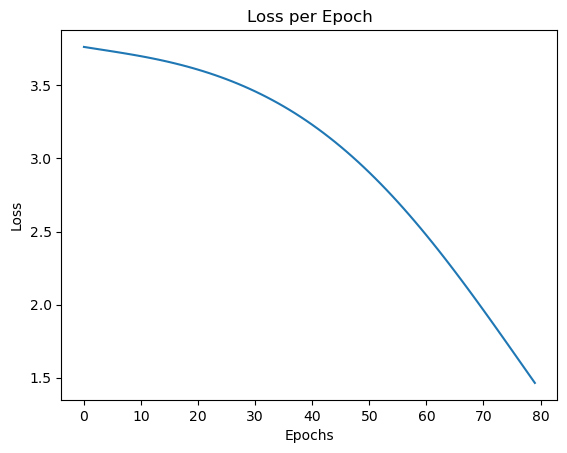

In [10]:
history.history.keys()
plt.plot(history.history['loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
# Predict function
def predict(context_words):
    context_idxs = np.array([word_to_ix[word] for word in context_words])
    context_idxs = context_idxs.reshape(1, -1)  # Reshape to match the model's input shape
    pred_idx = np.argmax(model.predict(context_idxs))
    return ix_to_word[pred_idx]

In [12]:
# Test Prediction
context = ['we', 'are', 'to', 'study']
predicted_word = predict(context)
print(f"Predicted word for context {context}: {predicted_word}")

Predicted word for context ['we', 'are', 'to', 'study']: about
